<a href="https://colab.research.google.com/github/kvinne-anc/Farmers-Market-Project/blob/master/FarmersMarketClean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#Uploaded my dataset that I cleaned previously 

In [ ]:
farm = pd.read_csv('/content/FarmersMarketClean.csv')
farm

,Unnamed: 0,MarketName,city,State,x,y,Credit,WIC,WICcash,SFMNP,SNAP
0,4,112st Madison Avenue,New York,New York,-73.949303,40.793900,0,0,1,1,0
1,6,125th Street Fresh Connect Farmers' Market,New York,New York,-73.948250,40.808952,1,1,0,1,1
2,11,170 Farm Stand,Bronx,New York,-73.916786,40.839886,1,0,1,1,1
3,12,175th Street Greenmarket,New York,New York,-73.938049,40.846355,1,1,1,1,1
4,35,441 Ministries Farm Stand,Rochester,New York,-77.566605,43.165833,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
668,8711,Woodstock Farm Festival,Woodstock,New York,-74.117836,42.040524,1,1,1,1,1
669,8733,Wyckoff Farmhouse Farmers' Market,Brooklyn,New York,-73.920601,40.644699,0,0,0,0,0
670,8743,YALE Farmers Market,Hempstead,New York,-73.615974,40.696568,1,1,0,1,1
671,8749,Yates County Cooperative Farm and Craft Market...,Penn Yan,New York,-77.053886,42.661346,1,1,0,1,0


In [ ]:
#Dropping the unnamed extra column 

In [ ]:
farm = farm.drop(['Unnamed: 0'], axis=1)
farm

,MarketName,city,State,x,y,Credit,WIC,WICcash,SFMNP,SNAP
0,112st Madison Avenue,New York,New York,-73.949303,40.793900,0,0,1,1,0
1,125th Street Fresh Connect Farmers' Market,New York,New York,-73.948250,40.808952,1,1,0,1,1
2,170 Farm Stand,Bronx,New York,-73.916786,40.839886,1,0,1,1,1
3,175th Street Greenmarket,New York,New York,-73.938049,40.846355,1,1,1,1,1
4,441 Ministries Farm Stand,Rochester,New York,-77.566605,43.165833,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
668,Woodstock Farm Festival,Woodstock,New York,-74.117836,42.040524,1,1,1,1,1
669,Wyckoff Farmhouse Farmers' Market,Brooklyn,New York,-73.920601,40.644699,0,0,0,0,0
670,YALE Farmers Market,Hempstead,New York,-73.615974,40.696568,1,1,0,1,1
671,Yates County Cooperative Farm and Craft Market...,Penn Yan,New York,-77.053886,42.661346,1,1,0,1,0


In [ ]:
Farm = farm.round(1)
Farm

,MarketName,city,State,x,y,Credit,WIC,WICcash,SFMNP,SNAP
0,112st Madison Avenue,New York,New York,-73.9,40.8,0,0,1,1,0
1,125th Street Fresh Connect Farmers' Market,New York,New York,-73.9,40.8,1,1,0,1,1
2,170 Farm Stand,Bronx,New York,-73.9,40.8,1,0,1,1,1
3,175th Street Greenmarket,New York,New York,-73.9,40.8,1,1,1,1,1
4,441 Ministries Farm Stand,Rochester,New York,-77.6,43.2,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
668,Woodstock Farm Festival,Woodstock,New York,-74.1,42.0,1,1,1,1,1
669,Wyckoff Farmhouse Farmers' Market,Brooklyn,New York,-73.9,40.6,0,0,0,0,0
670,YALE Farmers Market,Hempstead,New York,-73.6,40.7,1,1,0,1,1
671,Yates County Cooperative Farm and Craft Market...,Penn Yan,New York,-77.1,42.7,1,1,0,1,0


In [ ]:
#The binary nature of the data was causing my last graph (ultimately failed but left at the end so I can revisit it 
#and try to make it work later, also as a memorial to a lost 12 hours of my life and sanity)
#The code below was an attempt to sum the individual counts of a given payment method for each coordinate. There are multiple markets in the same areas so I hoped this 
#remove the binary element, which it did, but my 3D KDE plot at the end still wouldn't take them as Z-coordinate values. Either they show up as binary or, despite having two 
#variable, it returns an error saying the z value must be 2-dimensional. 

In [ ]:
Farm['Total_C'] = Farm.groupby(['city', 'x'])['Credit'].transform('sum')

In [ ]:
Farm['Total_C']

0      15.0
1      15.0
2      16.0
3       1.0
4      13.0
       ... 
668     1.0
669    12.0
670     1.0
671     1.0
672     1.0
Name: Total_C, Length: 673, dtype: float64

In [ ]:
Farm['Total_W'] = Farm.groupby(['city', 'x'])['WIC'].transform('sum')
Farm['Total_W']

0      18.0
1      18.0
2      16.0
3       1.0
4      14.0
       ... 
668     1.0
669    13.0
670     1.0
671     1.0
672     0.0
Name: Total_W, Length: 673, dtype: float64

In [ ]:
Farm['Total_W'].dropna

<bound method Series.dropna of 0      18.0
1      18.0
2      16.0
3       1.0
4      14.0
       ... 
668     1.0
669    13.0
670     1.0
671     1.0
672     0.0
Name: Total_W, Length: 673, dtype: float64>

In [ ]:
Farm['Total_C'].dtype

dtype('float64')

In [ ]:
Farm['Total_WC'] = Farm.groupby(['city', 'x'])['WICcash'].transform('sum')
Farm['Total_WC']

0      15.0
1      15.0
2      15.0
3       1.0
4       2.0
       ... 
668     1.0
669    12.0
670     0.0
671     0.0
672     0.0
Name: Total_WC, Length: 673, dtype: float64

In [ ]:
Farm['Total_S'] = Farm.groupby(['city', 'x'])['SNAP'].transform('sum')
Farm['Total_S']

0      15.0
1      15.0
2      15.0
3       1.0
4      14.0
       ... 
668     1.0
669    13.0
670     1.0
671     0.0
672     0.0
Name: Total_S, Length: 673, dtype: float64

In [ ]:
Farm['Total_P'] = Farm.groupby(['city', 'x'])['SFMNP'].transform('sum')
Farm['Total_P']

0      19.0
1      19.0
2      18.0
3       1.0
4       4.0
       ... 
668     1.0
669    15.0
670     1.0
671     1.0
672     0.0
Name: Total_P, Length: 673, dtype: float64

In [ ]:
#Exploring my data and changing it to compare it more easily

In [ ]:
Farm['x'].nunique()

70

In [ ]:
Farm['y'].nunique()

45

In [ ]:
Farm = Farm.drop(['MarketName'], axis=1)

In [ ]:
Farm = Farm.drop(['city'], axis=1)

In [ ]:
Farm = Farm.drop(['State'], axis=1)
Farm

,x,y,Credit,WIC,WICcash,SFMNP,SNAP,Total_C,Total_W,Total_WC,Total_S,Total_P
0,-73.9,40.8,0,0,1,1,0,15.0,18.0,15.0,15.0,19.0
1,-73.9,40.8,1,1,0,1,1,15.0,18.0,15.0,15.0,19.0
2,-73.9,40.8,1,0,1,1,1,16.0,16.0,15.0,15.0,18.0
3,-73.9,40.8,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
4,-77.6,43.2,1,1,0,0,1,13.0,14.0,2.0,14.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
668,-74.1,42.0,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
669,-73.9,40.6,0,0,0,0,0,12.0,13.0,12.0,13.0,15.0
670,-73.6,40.7,1,1,0,1,1,1.0,1.0,0.0,1.0,1.0
671,-77.1,42.7,1,1,0,1,0,1.0,1.0,0.0,0.0,1.0


In [ ]:
Farm.assign(location=Farm[['y', 'x']].values.tolist())

,x,y,Credit,WIC,WICcash,SFMNP,SNAP,Total_C,Total_W,Total_WC,Total_S,Total_P,location
0,-73.9,40.8,0,0,1,1,0,15.0,18.0,15.0,15.0,19.0,"[40.8, -73.9]"
1,-73.9,40.8,1,1,0,1,1,15.0,18.0,15.0,15.0,19.0,"[40.8, -73.9]"
2,-73.9,40.8,1,0,1,1,1,16.0,16.0,15.0,15.0,18.0,"[40.8, -73.9]"
3,-73.9,40.8,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,"[40.8, -73.9]"
4,-77.6,43.2,1,1,0,0,1,13.0,14.0,2.0,14.0,4.0,"[43.2, -77.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,-74.1,42.0,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,"[42.0, -74.1]"
669,-73.9,40.6,0,0,0,0,0,12.0,13.0,12.0,13.0,15.0,"[40.6, -73.9]"
670,-73.6,40.7,1,1,0,1,1,1.0,1.0,0.0,1.0,1.0,"[40.7, -73.6]"
671,-77.1,42.7,1,1,0,1,0,1.0,1.0,0.0,0.0,1.0,"[42.7, -77.1]"


In [ ]:
FarmC = Farm[Farm['Credit']== 1]
FarmC.head()

,x,y,Credit,WIC,WICcash,SFMNP,SNAP,Total_C,Total_W,Total_WC,Total_S,Total_P
1,-73.9,40.8,1,1,0,1,1,15.0,18.0,15.0,15.0,19.0
2,-73.9,40.8,1,0,1,1,1,16.0,16.0,15.0,15.0,18.0
3,-73.9,40.8,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
4,-77.6,43.2,1,1,0,0,1,13.0,14.0,2.0,14.0,4.0
5,-74.0,40.8,1,1,1,1,1,24.0,23.0,22.0,23.0,23.0


In [ ]:
#Making my scatter plots 

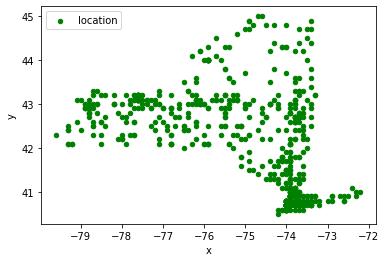

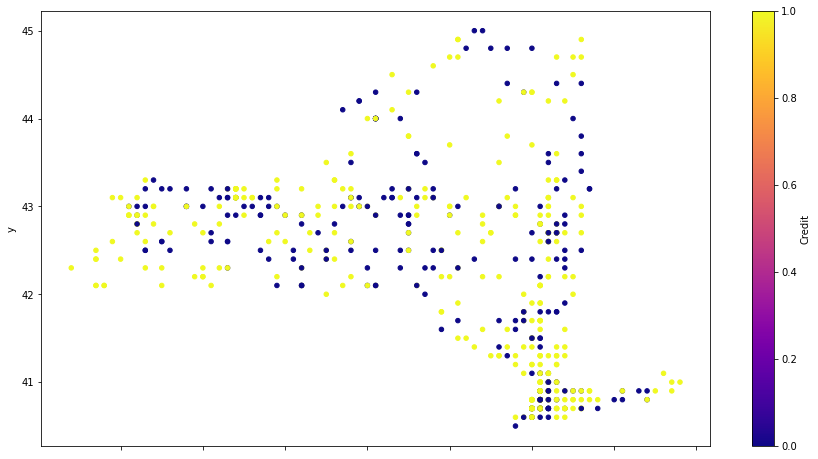

In [ ]:
test = Farm.plot(kind='scatter', x='x',y='y',color = 'Green',label ='location')
Farm.plot(kind = 'scatter', x='x', y='y', c='Credit', colormap='plasma', figsize=(15,8));
plt.savefig('Farm_Credit.png')

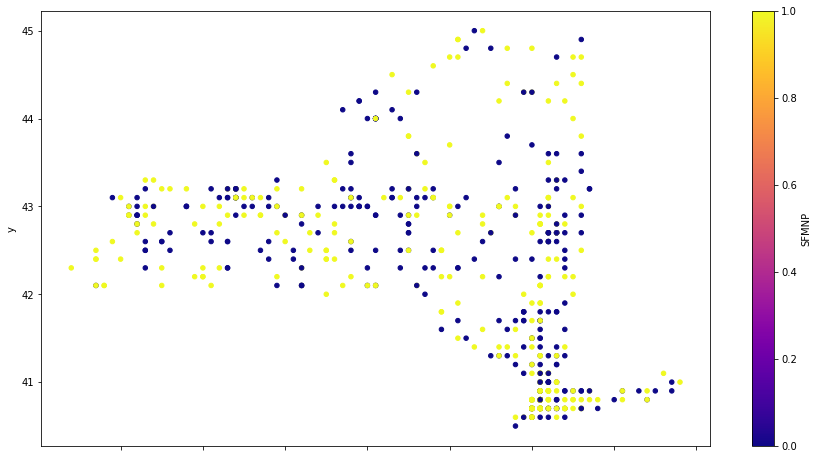

In [ ]:
Farm.plot(kind = 'scatter', x='x', y='y', c='SFMNP', colormap='plasma', figsize=(15,8));

plt.savefig('Farm_SFMNP.png')

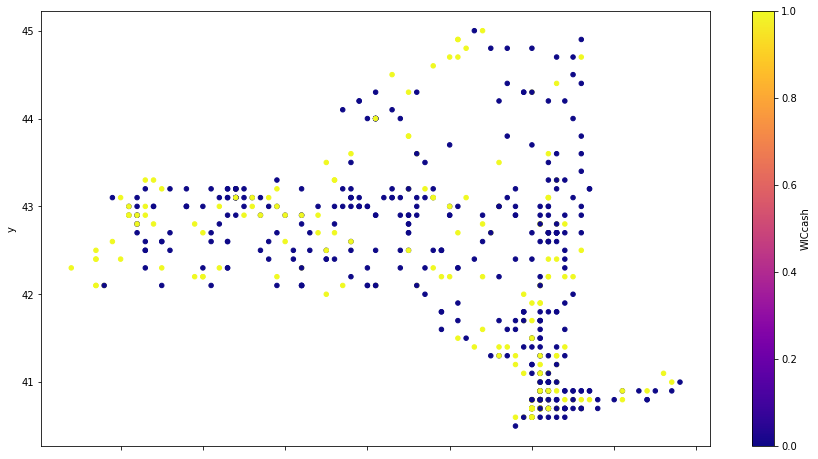

In [ ]:
Farm.plot(kind = 'scatter', x='x', y='y', c='WICcash', colormap='plasma', figsize=(15,8));
plt.savefig('Farm_WICcash.png')

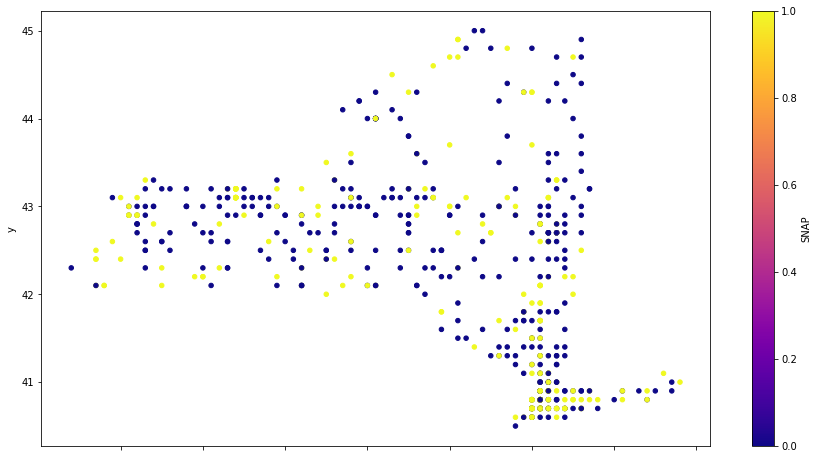

In [ ]:
Farm.plot(kind = 'scatter', x='x', y='y', c='SNAP', colormap='plasma', figsize=(15,8));
plt.savefig('Farm_SNAP.png')

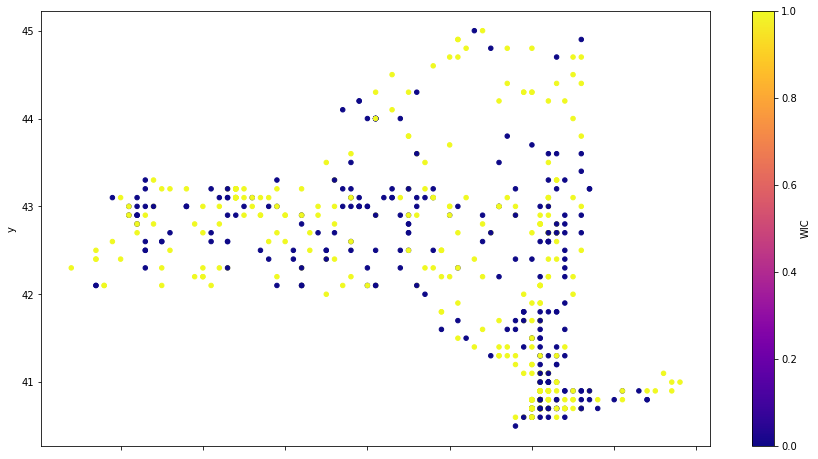

In [ ]:
Farm.plot(kind = 'scatter', x='x', y='y', c='WIC', colormap='plasma', figsize=(15,8));
plt.savefig('Farm_WIC.png')


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


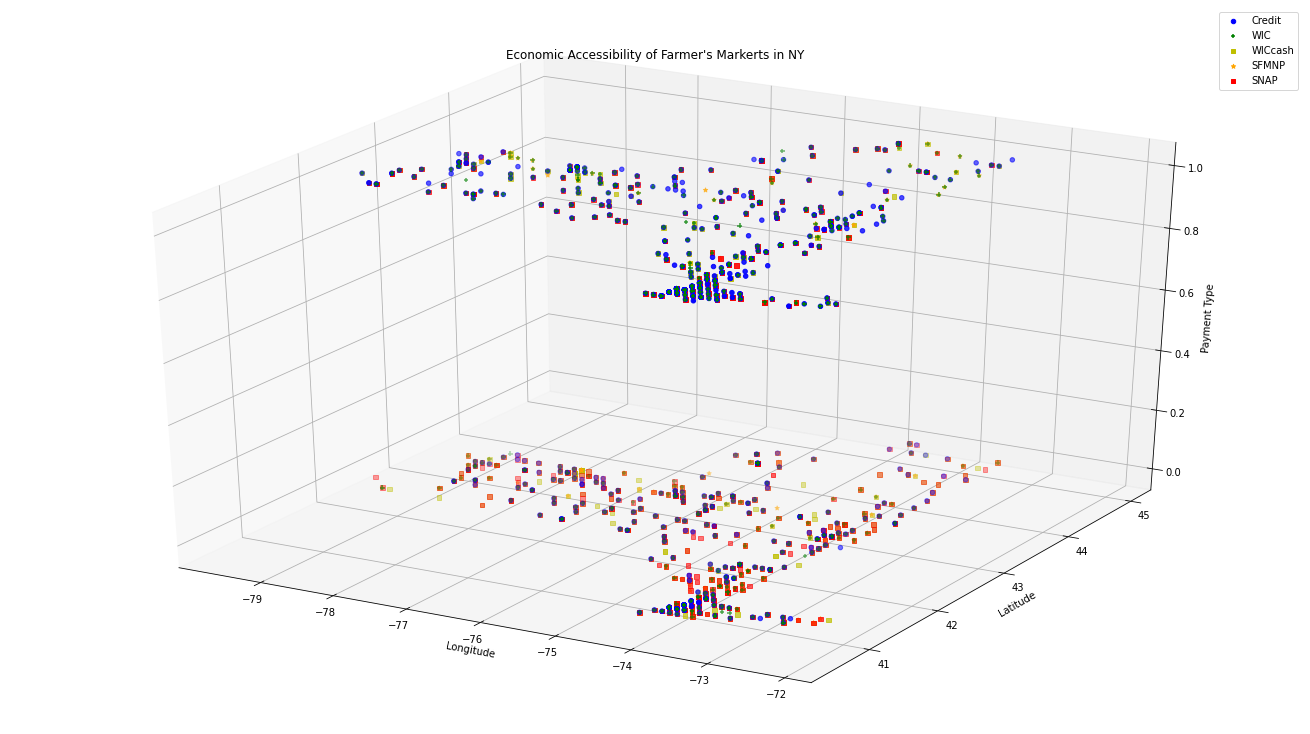

<Figure size 432x288 with 0 Axes>

In [ ]:

fig = plt.figure(figsize=(18,10))
ax = Axes3D(fig)
ax.set_title("Economic Accessibility of Farmer's Markerts in NY")

#Set my variables
x_val = Farm['x']
y_val = Farm['y']
z_val = Farm['Credit']
c_val = Farm['WIC']
d_val = Farm['WICcash']
e_val = Farm['SFMNP']
f_val = Farm['SNAP']

# Plot the values and label axes
ax.scatter(x_val, y_val, z_val, c = 'b', marker='o', label="Credit")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Payment Type')


ax.scatter(x_val, y_val, c_val, c= 'g', marker = '+', label="WIC")
ax.scatter(x_val, y_val, d_val, c= 'y', marker = ',', label="WICcash")   
ax.scatter(x_val, y_val, e_val, c= 'orange', marker = '*', label="SFMNP")
ax.scatter(x_val, y_val, f_val, c= 'r', marker = 's', label="SNAP")
ax.legend();

plt.show()

plt.savefig('Farm_ALL.jpeg')

In [ ]:

from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

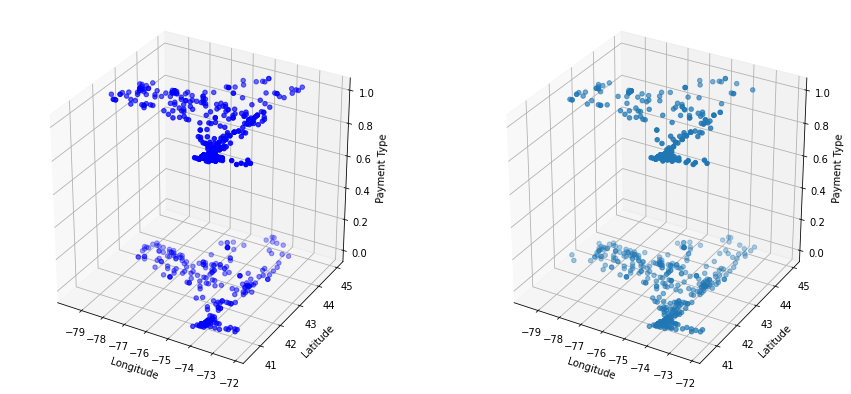

<Figure size 432x288 with 0 Axes>

In [ ]:

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')


x_val = Farm['x']
y_val = Farm['y']
z_val = Farm['Credit']
c_val = Farm['WIC']
d_val = Farm['WICcash']
e_val = Farm['SFMNP']
f_val = Farm['SNAP']

ax.scatter(x_val, y_val, z_val, c = 'b', marker='o', label="Credit")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Payment Type')


#Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x_val, y_val, f_val, cmap=cm.binary, marker='o', label="SNAP")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Payment Type')


plt.show()

plt.savefig('Farm_Doub.png')


In [ ]:
#KDE attempt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


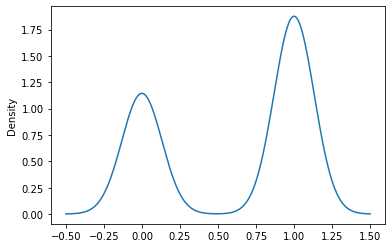

In [ ]:
Farm['Credit'].plot.density();

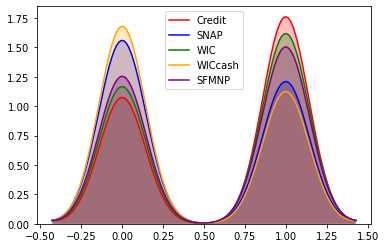

In [ ]:
# plot of all 5 payment methods based on how accepted they are across NY state Farmer's Markets
p1=sns.kdeplot(Farm['Credit'], shade=True, color="r")
p2=sns.kdeplot(Farm['SNAP'], shade=True, color="b")
p3=sns.kdeplot(Farm['WIC'], shade=True, color="g")
p4=sns.kdeplot(Farm['WICcash'], shade=True, color="orange")
p5=sns.kdeplot(Farm['SFMNP'], shade=True, color="purple")
plt.savefig('Farm_KDE.png')


In [ ]:
#These graphs show the ratio for each payment method as accepted or not accepted 

In [ ]:
FarmT = Farm.drop(['Credit', 'WIC', 'WICcash', 'SNAP', 'SFMNP'], axis=1)
FarmT

,x,y
0,-73.9,40.8
1,-73.9,40.8
2,-73.9,40.8
3,-73.9,40.8
4,-77.6,43.2
...,...,...
668,-74.1,42.0
669,-73.9,40.6
670,-73.6,40.7
671,-77.1,42.7


In [ ]:
import scipy.stats as st
import sklearn.cross_decomposition

pls2 = sklearn.cross_decomposition.PLSRegression()
cca = sklearn.cross_decomposition.CCA()

In [ ]:
x = FarmT.x
y = FarmT.y

deltaX = (max(x) - min(x))/5
deltaY = (max(y) - min(y))/5

xmin = (min(x) - deltaX)
xmax = (max(x) + deltaX)

ymin = min(y) - deltaY
ymax = max(y) + deltaY

print(xmin, xmax, ymin, ymax)

-81.08 -70.72 39.6 45.9


In [ ]:
from sklearn.decomposition import FastICA
# Removed pls2.fit(xx, yy) and error went away 

In [ ]:
xx, yy = np.mgrid[xmin:xmax:-100j, ymin:ymax:100j]

np.isnan(xx).any()
np.isnan(yy).any()

np.isinf(xx).any()
np.isinf(yy).any()

False

In [ ]:
np.isnan(x).any()
np.isnan(y).any()

np.isinf(x).any()
np.isinf(y).any()

False

In [ ]:
x = x.astype(float)
y = y.astype(float)
xx = xx.astype(float)
yy = yy.astype(float)


In [ ]:
vc = Farm['Total_C']
vc = vc.fillna(2).astype(int)

In [ ]:
vw = Farm['Total_W']

vw = vw.fillna(2).astype(int)

In [ ]:
c_val = c_val.fillna(2).astype(int)

In [ ]:
d_val = d_val.fillna(2).astype(int)
d_val

0      1
1      0
2      1
3      1
4      0
      ..
668    1
669    0
670    0
671    0
672    0
Name: WICcash, Length: 673, dtype: int64

In [ ]:
vw

0      18
1      18
2      16
3       1
4      14
       ..
668     1
669    13
670     1
671     1
672     0
Name: Total_W, Length: 673, dtype: int64

In [ ]:
from mpl_toolkits.mplot3d import axes3d


In [ ]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([vw, vc])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


In [ ]:
print(f.shape)

(100, 100)


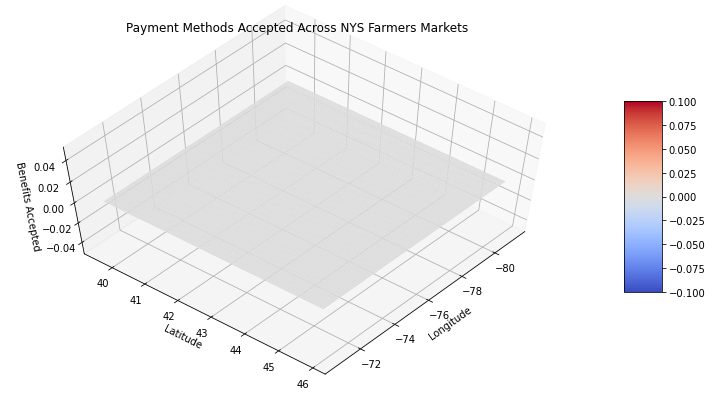

In [ ]:
#3D KDE Plot 

fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Benefits Accepted')
ax.set_title('Payment Methods Accepted Across NYS Farmers Markets')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 40)
plt.savefig('Farm_FUCK.png')

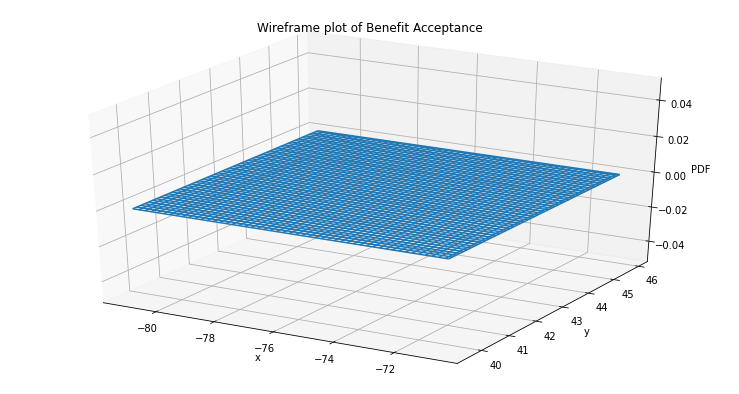

In [ ]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')

w = ax.plot_wireframe(xx, yy, f)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Wireframe plot of Benefit Acceptance');